# Question 1 : Classification of XOR data 

At first sight, it may seem as if separating the XOR data is a simple task.  However, due to the fact that the data is not linearly separable and that fitting the data requires non-trivial learning, the XOR problem has been a case study of interest on many topics related to training of feedforward networks.  In the 1960s, Minsky and Papert’s observations that perceptrons (neural network ancestors) were unable to fit the XOR data contributed to the rise of the first AI winter.  XOR data makes for such an interesting case study that papers describing learning properties of networks trained on it are still being published to this day.

Create arrays containing the input data and the corresponding output labels for the XOR operator.  Recall that XOR takes as input two binary variables, and outputs a 0/1 if they have the same/different value.  

In other words, the XOR training includes four, two-dimensional data samples with labels.  Create and train a network with at least three hidden layers that separates the XOR data, that is, a network that gets 100% performance on the four training samples above.  Monitor the accuracy on the training set as the training progresses.


## Installing required libraries

In [2]:
!pip install torch

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Function Definitions

In [4]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        torch.nn.init.uniform_(self.fc1.weight, a=0, b=1)
        self.fc2 = nn.Linear(3, 3)
        torch.nn.init.uniform_(self.fc2.weight, a=0, b=1)        
        self.fc3 = nn.Linear(3, 3)
        torch.nn.init.uniform_(self.fc3.weight, a=0, b=1)        
        self.fc4 = nn.Linear(3, 3)
        torch.nn.init.uniform_(self.fc4.weight, a=0, b=1)       
        self.fc5 = nn.Linear(3, 2)
        torch.nn.init.uniform_(self.fc5.weight, a=0, b=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x)

# function for plotting      
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

# function for plotting decision boundary
def plot_decision_boundary(clf, X, y, filename):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

## The data

In [5]:
xor_data = pd.read_csv('XOR.csv')

In [6]:
X = xor_data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = xor_data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

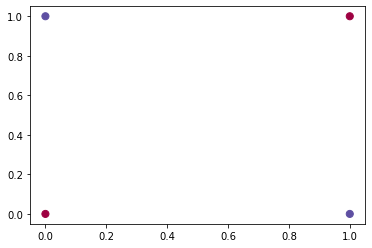

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 50)
plt.show()

## Part a

Plot the decision boundaries of the earliest network in the training process that achieves 100% accuracy by plotting the network outputs in a densely sampled region around [-0.5,1.5] × [-0.5,1.5]. (5 points)


In [8]:
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


# create a loss function
criterion = nn.NLLLoss()

nepochs = 20000
data, target = X, y

# run the main training loop
for epoch in range(nepochs):
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 10 == 0:
        print('Epoch =', epoch, ', Loss =', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data) 
        if accuracy == 1:
            print('Epoch =', epoch, ', Loss = ', loss.item())
            print('Training accuracy = ', accuracy)
            break
        
# compute accuracy on training data
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy =', accuracy)

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/3982323833.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch = 0 , Loss = 0.7036383152008057
Epoch = 10 , Loss = 0.6801435947418213
Epoch = 20 , Loss = 0.8069858551025391
Epoch = 30 , Loss = 1.1410553455352783
Epoch = 40 , Loss = 0.9330165386199951
Epoch = 50 , Loss = 2.244586706161499
Epoch = 60 , Loss = 0.9147142171859741
Epoch = 70 , Loss = 3.8342840671539307
Epoch = 80 , Loss = 7.448741912841797
Epoch = 90 , Loss = 7.504227161407471
Epoch = 100 , Loss = 3.064213514328003
Epoch = 110 , Loss = 5.759102821350098
Epoch = 120 , Loss = 14.929611206054688
Epoch = 130 , Loss = 20.998611450195312
Epoch = 140 , Loss = 22.729572296142578
Epoch = 150 , Loss = 19.691341400146484
Epoch = 160 , Loss = 11.733596801757812
Epoch = 170 , Loss = 1.2799701690673828
Epoch = 180 , Loss = 17.194332122802734
Epoch = 190 , Loss = 31.536479949951172
Epoch = 200 , Loss = 42.043067932128906
Epoch = 210 , Loss = 47.955665588378906
Epoch = 220 , Loss = 49.00982666015625
Epoch = 230 , Loss = 45.11335754394531
Epoch = 240 , Loss = 36.234107971191406
Epoch = 250 , Loss

In [9]:
print(net.fc1.weight)
print(net.fc2.weight)
print(net.fc3.weight)
print(net.fc4.weight)
print(net.fc5.weight)

Parameter containing:
tensor([[-1528.8915, -5523.7012],
        [  530.2429,   208.7794],
        [-3193.6394, -7617.1128]], requires_grad=True)
Parameter containing:
tensor([[-9772.2744,   578.9077, -6740.3535],
        [-5649.1328,   232.2209, -4062.5300],
        [-5516.3081,   594.4395, -4140.3818]], requires_grad=True)
Parameter containing:
tensor([[ -485.6030,  -731.4153,    99.3140],
        [-3521.9634, -6071.2646,  -573.5346],
        [-2158.3091, -3701.6282,  -527.1506]], requires_grad=True)
Parameter containing:
tensor([[  -204.4523,  -3000.9285,  -2001.5150],
        [  -539.2286,  -9698.4912, -10752.3486],
        [  -138.9335,  -3525.7830,  -3522.7957]], requires_grad=True)
Parameter containing:
tensor([[  999.0788, -8610.5957, -3965.6099],
        [ -997.6282,  8611.7285,  3967.4583]], requires_grad=True)


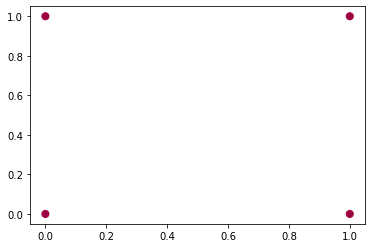

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)
plt.show()

In [12]:
plot_decision_boundary(net, X, y, 'Q1_part_a.pdf')

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/3982323833.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Part b

Plot the decision boundaries of a network after the loss falls below 	1×10-4. (5 points)

In [13]:
#train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.NLLLoss()

nepochs = 40000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch =', epoch, ', Loss =', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        
    if loss.item() < 0.0001:
        print('Epoch =', epoch, ', Loss =', loss.item())
        print('Training accuracy is ', accuracy)
        break
        
# compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/3982323833.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch = 0 , Loss = 1.228029489517212
Epoch = 10 , Loss = 0.7280269265174866
Epoch = 20 , Loss = 0.7107393741607666
Epoch = 30 , Loss = 0.7100126147270203
Epoch = 40 , Loss = 0.7062042951583862
Epoch = 50 , Loss = 0.7009687423706055
Epoch = 60 , Loss = 0.6972435712814331
Epoch = 70 , Loss = 0.6954777836799622
Epoch = 80 , Loss = 0.6949543356895447
Epoch = 90 , Loss = 0.6946072578430176
Epoch = 100 , Loss = 0.6943398714065552
Epoch = 110 , Loss = 0.694125771522522
Epoch = 120 , Loss = 0.6939529180526733
Epoch = 130 , Loss = 0.6938122510910034
Epoch = 140 , Loss = 0.6936970949172974
Epoch = 150 , Loss = 0.6936023235321045
Epoch = 160 , Loss = 0.693524181842804
Epoch = 170 , Loss = 0.6934595108032227
Epoch = 180 , Loss = 0.6934061050415039
Epoch = 190 , Loss = 0.693361759185791
Epoch = 200 , Loss = 0.6933250427246094
Epoch = 210 , Loss = 0.6932947635650635
Epoch = 220 , Loss = 0.6932694911956787
Epoch = 230 , Loss = 0.6932486295700073
Epoch = 240 , Loss = 0.6932313442230225
Epoch = 250 , L

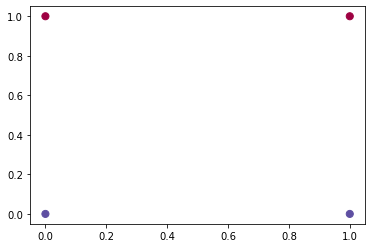

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

In [15]:
plot_decision_boundary(net, X, y, 'Q1_part_b.pdf')

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/3982323833.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [16]:
print(net.fc1.weight)
print(net.fc2.weight)
print(net.fc3.weight)
print(net.fc4.weight)
print(net.fc5.weight)

Parameter containing:
tensor([[0.6786, 0.5318],
        [0.4859, 0.7700],
        [0.6909, 0.2302]], requires_grad=True)
Parameter containing:
tensor([[ 0.4240,  0.8782,  0.4689],
        [ 0.1468,  0.5095,  0.2632],
        [-0.0549,  0.8159,  0.8000]], requires_grad=True)
Parameter containing:
tensor([[ 0.4404,  0.2160,  0.5122],
        [ 0.5325,  0.0720,  0.3663],
        [-0.1219,  0.3828,  0.5496]], requires_grad=True)
Parameter containing:
tensor([[-0.0278,  0.8549,  0.0206],
        [ 0.7540,  0.1916,  0.8293],
        [ 0.3344,  0.7597,  0.5536]], requires_grad=True)
Parameter containing:
tensor([[0.4891, 0.2502, 1.0537],
        [0.6476, 0.4687, 0.7347]], requires_grad=True)


## Part c

Gradually decrease the capacity of the network above.  Find the smallest network that can still separate the data, i.e., find the least number of hidden layers and neurons that produces an accuracy of 1 on the training set? (5 points) [A portion of the total points is allocated to your rank amongst your peers in achieving the smallest network]


In [18]:
class Net_smallest(nn.Module):
    
    def __init__(self):
        super(Net_smallest, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        torch.nn.init.uniform_(self.fc1.weight, a=0, b=1)
        
        self.fc2 = nn.Linear(2, 2)
        torch.nn.init.uniform_(self.fc2.weight, a=0, b=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)
        #return F.softmax(x)

In [19]:
# train
net = Net_smallest()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
criterion = nn.NLLLoss()

nepochs = 40000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch =', epoch, ', Loss =', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        if accuracy == 1:
            print('Epoch =', epoch, ', Loss =', loss.item())
            print('Training accuracy is ', accuracy)
            break
        
# compute accuracy on training data
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

Epoch = 0 , Loss = 0.7040287852287292
Epoch = 10 , Loss = 0.6947921514511108
Epoch = 20 , Loss = 0.6863323450088501
Epoch = 30 , Loss = 0.6813880205154419
Epoch = 40 , Loss = 0.674472451210022
Epoch = 50 , Loss = 0.6664308309555054
Epoch = 60 , Loss = 0.6570623517036438
Epoch = 70 , Loss = 0.6459668874740601
Epoch = 80 , Loss = 0.635154664516449
Epoch = 90 , Loss = 0.6239791512489319
Epoch = 100 , Loss = 0.6112431287765503
Epoch = 110 , Loss = 0.5980989933013916
Epoch = 120 , Loss = 0.5849587917327881
Epoch = 130 , Loss = 0.5706372261047363
Epoch = 140 , Loss = 0.5562910437583923
Epoch = 150 , Loss = 0.5419378280639648
Epoch = 160 , Loss = 0.5278540253639221
Epoch = 170 , Loss = 0.5128071904182434
Epoch = 180 , Loss = 0.49756360054016113
Epoch = 190 , Loss = 0.4824790060520172
Epoch = 200 , Loss = 0.46755239367485046
Epoch = 210 , Loss = 0.4526820778846741
Epoch = 220 , Loss = 0.43765148520469666
Epoch = 230 , Loss = 0.42197883129119873
Epoch = 240 , Loss = 0.4059251546859741
Epoch = 2

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/2338720271.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


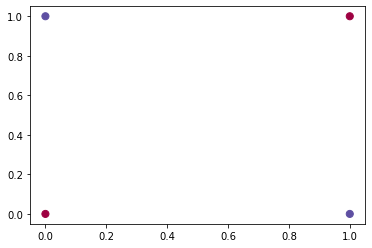

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)
plt.show()

In [22]:
plot_decision_boundary(net, X, y, 'Q1_part_c.pdf')

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_42258/2338720271.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [23]:
print(net.fc1.weight)
print(net.fc2.weight)

Parameter containing:
tensor([[0.7036, 1.0219],
        [1.3338, 1.3401]], requires_grad=True)
Parameter containing:
tensor([[ 0.0086,  2.3259],
        [ 1.3055, -0.6812]], requires_grad=True)
